Qusetion 1)

Given

inputs (x1, x2, x3, x4) = (−0.7,1.2,1.1,−2)

w1​=−1.7, w2​=0.1, w3​=−0.6, w4​=−1.8, w5​=−0.2, w6​=0.5

s1​​​=w1​x1​+w2​x2

​=(−1.7)(−0.7)+0.1(1.2)=1.19+0.12=1.31

h1 = sigmoid(s1) = sigmoid(1.31) = 0.78 (two decimal digits)

s2​​​=w3​x3​+w4​x4

​=(−0.6)(1.1)+(−1.8)(−2)=−0.66+3.6=2.94

h2 = sigmoid(s2) = sigmoid(2.94) = 0.94 (two decimal digits)

s3​=w5​h1​+w6​h2​

(−0.2)(0.78)+0.5(0.94)

−0.156+0.47=0.314

y_hat = sigmoid(0.314) = 0.58

Loss = (y_hat - y)**2

y = 0.5 , y_hat = 0.58

Loss = (y_hat ​− y)**2= (0.58−0.5)**2 = 0.0064

Backpropagation

∂L/∂y_hat ​= 2(y_hat ​− y) = 2(0.08)  = 0.16

∂y_hat/∂s3 = y_hat(1−y_hat​)=0.58(1−0.58)  = 0.58×0.42=0.24

∂h1​/∂s3​ ​= w5​= −0.2

∂h1/∂s1 = h1​(1−h1​) = 0.78(1−0.78) = 0.78×0.22 = 0.17

∂s1/∂w1 = -0.7

∂L/∂w1 = ∂L/∂y_hat * ∂y_hat/∂s3 * ∂h1​/∂s3 * ∂h1/∂s1 * ∂s1/∂w1

= (0.16)(0.24)(−0.2)(0.17)(−0.7) = 0.000904 ( if we take four decimal digits)

= 0.0009 ( the loss function is almost zero)





	​




Question 2a)

In [ ]:
import pandas as pd

train = pd.read_csv("trainData.txt")
test = pd.read_csv("testData.txt")

print("Train samples:", len(train))
print("Test samples:", len(test))
train.head()



Train samples: 8143
Test samples: 9752


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Question 2b)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
feature_cols = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]

X_train = train[feature_cols].values
y_train = train["Occupancy"].values

X_test = test[feature_cols].values
y_test = test["Occupancy"].values

print(X_train.shape, X_test.shape)
def hidden_layer(hidden_units):
   hidden_model= models.Sequential([
        layers.Input(shape=(5,)),
        layers.Dense(hidden_units, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

   hidden_model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
   return hidden_model


(8143, 5) (9752, 5)


In [ ]:
hidden_units_list = [4, 8, 16, 32, 64]
results = []

for h in hidden_units_list:
    print(f"\nTraining model with {h} hidden units...")
    model = hidden_layer(h)

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=30,
        validation_data=(X_test, y_test),
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy for {h} hidden units: {test_acc:.4f}")

    results.append((h, test_acc))



Training model with 4 hidden units...
Test accuracy for 4 hidden units: 0.7899

Training model with 8 hidden units...
Test accuracy for 8 hidden units: 0.9192

Training model with 16 hidden units...
Test accuracy for 16 hidden units: 0.9616

Training model with 32 hidden units...
Test accuracy for 32 hidden units: 0.9312

Training model with 64 hidden units...
Test accuracy for 64 hidden units: 0.9484


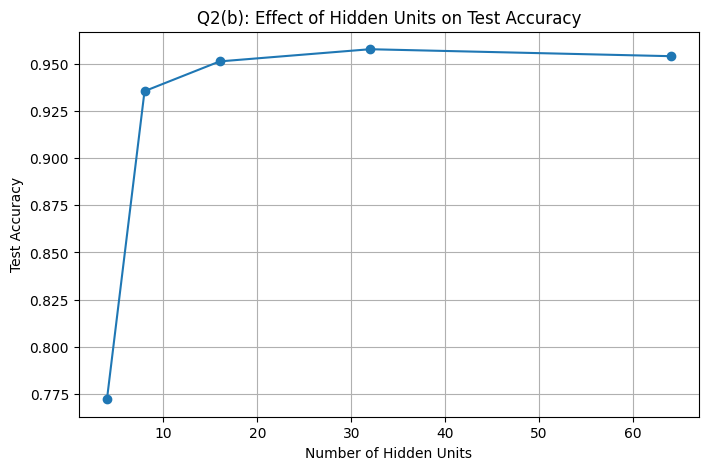

In [ ]:
hidden_list = [i[0] for i in results]
accuracy_list = [i[1] for i in results]


plt.figure(figsize=(8, 5))
plt.plot(hidden_list, accuracy_list, marker="o")
plt.title("Q2(b): Effect of Hidden Units on Test Accuracy")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()


Question 2c)

In [ ]:
def two_hidden_layers(h1, h2):
    model = models.Sequential([
        layers.Input(shape=(5,)),
        layers.Dense(h1, activation="relu"),
        layers.Dense(h2, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
architectures = [(2, 4), (6, 8), (10, 12)]
two_layer_results = []

for h1, h2 in architectures:
    print(f"\nTraining model with architecture 5-{h1}-{h2}-1...")
    model = two_hidden_layers(h1, h2)

    history = model.fit(
        X_train, y_train,
        epochs=35,
        batch_size=30,
        validation_data=(X_test, y_test),
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy for 5-{h1}-{h2}-1: {test_acc:.4f}")

    two_layer_results.append(((h1, h2), test_acc))

print("\nSummary of 2-hidden-layer architectures:")
for (h1, h2), acc in two_layer_results:
    print(f"Architecture 5-{h1}-{h2}-1 -> Test accuracy: {acc:.4f}")



Training model with architecture 5-2-4-1...
Test accuracy for 5-2-4-1: 0.9729

Training model with architecture 5-6-8-1...
Test accuracy for 5-6-8-1: 0.9929

Training model with architecture 5-10-12-1...
Test accuracy for 5-10-12-1: 0.9221

Summary of 2-hidden-layer architectures:
Architecture 5-2-4-1 -> Test accuracy: 0.9729
Architecture 5-6-8-1 -> Test accuracy: 0.9929
Architecture 5-10-12-1 -> Test accuracy: 0.9221


Question 2d)

The hidden single layer model showed clear improvement as hidden units increased from 4 to 16, with test accuracy rising from 0.78 to 0.96, meaning very small models were underfitting the data. Even though all models were trained with the same 30 epochs and batch size of 32, increasing the hidden units beyond 16 did not give much extra improvement, as the accuracy stayed around 0.93–0.95, showing that bigger models were only giving small gains and started to overfit.

Among the two hidden layer networks, the 5-6-8-1 model reached the best accuracy (0.9929), showing that a balanced deeper model can learn the sensor patterns very well. The 5-2-4-1 model also performed strongly (0.97), while the bigger 5-10-12-1 model dropped to 0.92, proving that making the model too large does not always help and can reduce performance.

Overall, the results show that occupancy prediction works best when the model has the right size not too small to underfit and not too big to overfit.

Question 3)

In the paper, the authors employ a Recurrent Neural Network using a Long Short-Term Memory (LSTM) architecture to forecast future stock prices for Google and Nike. LSTMs were selected because conventional neural networks struggle to retain long range temporal information, whereas LSTMs maintain context over time through memory cells and gating mechanisms, enabling them to learn complex financial patterns.

The model developed by the authors consists of four stacked LSTM layers, each containing 96 units, complemented by dropout layers to minimise overfitting, followed by a final dense output layer. Historical opening-price data sourced from Yahoo Finance was normalised and split into 80% training and 20% testing before being fed into the network.

Training was conducted using the mean squared error loss function, and the authors experimented with multiple epoch settings (12, 25, 50, 100) to analyse how longer training affects predictive accuracy. The results presented in Figures 3 and 4 clearly show that performance improves as epochs increase, with the model closely tracking real price movements during periods of market stability. However, accuracy declined when the asset displayed high volatility, highlighting the challenges posed by abrupt market fluctuations.

Overall, the study concludes that LSTM-based RNNs are highly effective for stock market forecasting because they capture temporal dependencies, non linear trends, and pattern continuity far better than traditional statistical methods.